<a href="https://colab.research.google.com/github/skiym-aaa/practice-kaggle/blob/master/%E3%83%91%E3%83%A9%E3%83%A1%E3%83%BC%E3%82%BF%E3%83%BC%E3%83%81%E3%83%A5%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.8136924803591471


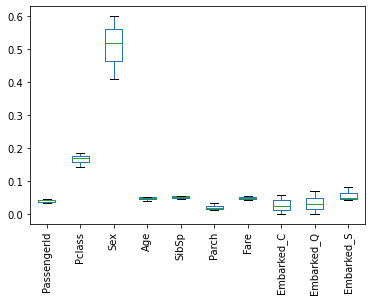

In [ ]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pylab as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

warnings.filterwarnings('ignore')


def validate(train_x, train_y):
    accuracies = []
    feature_importances = []

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    for train_idx, test_idx in cv.split(train_x, train_y):
        trn_x = train_x.iloc[train_idx, :]
        val_x = train_x.iloc[test_idx, :]

        trn_y = train_y.iloc[train_idx]
        val_y = train_y.iloc[test_idx]

        clf = xgb.XGBClassifier()
        clf.fit(trn_x, trn_y)

        pred_y = clf.predict(val_x)
        feature_importances.append(clf.feature_importances_)
        accuracies.append(accuracy_score(val_y, pred_y))
    print(np.mean(accuracies))
    return accuracies, feature_importances


def plot_feature_importances(feature_importances, cols):
    df_fimp = pd.DataFrame(feature_importances, columns=cols)
    df_fimp.plot(kind="box", rot=90)


def preprocess_df(df):
    # CabinはこのあとDropするので、コードから削除
    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())
    
    # 列の削除
    df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
    
    # Sexの01化とEmbarkedのダミー化 
    df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})
    df = pd.get_dummies(df)

    return df


# test dataのpredict
def predict_df(train_x, train_y, test_x, df_test_raw, path_output="result.csv"):
    clf = xgb.XGBClassifier()
    clf.fit(train_x, train_y)
    preds = clf.predict(test_x)
    
    _df = pd.DataFrame()
    _df["PassengerId"] = df_test_raw["PassengerId"]
    _df["Survived"] = preds
    _df.to_csv(path_output, index=False)


# デバッグするときはmain関数から外して、直で叩く方が楽です。
def main():
    df_train = pd.read_csv("train.csv")

    # ここは前処理
    train_y = df_train["Survived"]
    train_x = df_train.drop("Survived", axis=1)

    train_x = preprocess_df(train_x)
    accuracies, feature_importances = validate(train_x, train_y)
    plot_feature_importances(feature_importances, train_x.columns)

    flag_product = True
    if flag_product:
        df_test = pd.read_csv("test.csv")
        df_test_raw = df_test.copy()
        test_x = preprocess_df(df_test)
        predict_df(train_x, train_y, test_x, df_test_raw, "result.csv")


#  `if __name__ == '__main__':` はおまじないのようなモノと思ってください。
if __name__ == '__main__':
    main()

0.8114478114478114


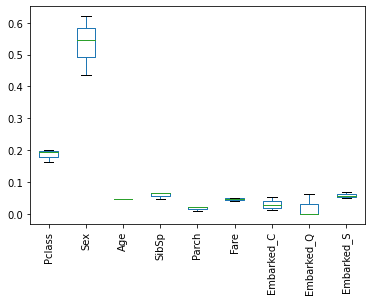

In [ ]:
def preprocess_df(df):

    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())
    
    df.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)
    
    df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})
    df = pd.get_dummies(df)

    return df

if __name__ == '__main__':
    main()

0.8159371492704826


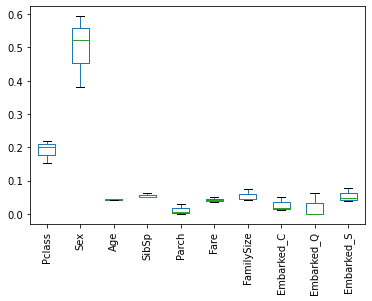

In [ ]:
def preprocess_df(df):

    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
   
    df.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)
    
    df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})
    df = pd.get_dummies(df)

    return df

if __name__ == '__main__':
    main()


0.8159371492704826


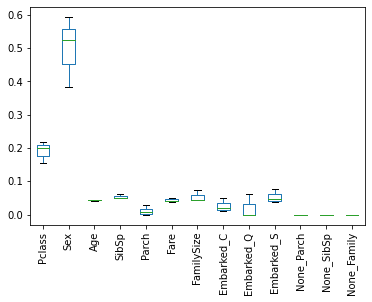

In [ ]:
def preprocess_df(df):

    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
   
    df.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)

    df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})
    df = pd.get_dummies(df)
    
    df["None_Parch"] = [1 if val == 0 else 0 for val in df["Parch"]]
    df["None_SibSp"] = [1 if val == 0 else 0 for val in df["SibSp"]]
    df["None_Family"] = [1 if val == 1 else 0 for val in df["FamilySize"]]

    return df

if __name__ == '__main__':
    main()

0.8159371492704826


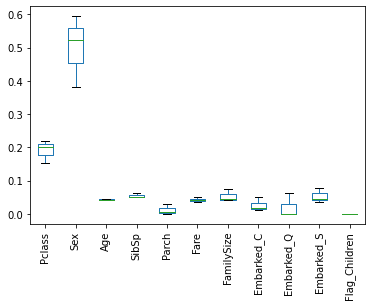

In [ ]:
def preprocess_df(df):

    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
   
    df.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)

    df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})
    df = pd.get_dummies(df)
    
    df["Flag_Children"] = [1 if val < 11 else 0 for val in df["Age"]]

    return df

if __name__ == '__main__':
    main()

In [2]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pylab as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm_notebook as tqdm

warnings.filterwarnings('ignore')

# all_paramsはグローバル変数として宣言
all_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'min_child_weight': [3, 5, 10],
    'n_estimetors': [10000],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'colsample_bylevel': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1],
    'random_state': [0],
    'n_jobs': [1],
}


def validate(train_x, train_y, params):
    accuracies = []
    feature_importances = []

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    for train_idx, test_idx in cv.split(train_x, train_y):
        trn_x = train_x.iloc[train_idx, :]
        val_x = train_x.iloc[test_idx, :]

        trn_y = train_y.iloc[train_idx]
        val_y = train_y.iloc[test_idx]

        clf = xgb.XGBClassifier(**params)
        clf.fit(trn_x, trn_y)

        pred_y = clf.predict(val_x)
        feature_importances.append(clf.feature_importances_)
        accuracies.append(accuracy_score(val_y, pred_y))
    print(np.mean(accuracies))
    return accuracies, feature_importances


def plot_feature_importances(feature_importances, cols):
    df_fimp = pd.DataFrame(feature_importances, columns=cols)
    df_fimp.plot(kind="box", rot=90)


def preprocess_df(df):
    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
   
    df.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)

    df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})
    df = pd.get_dummies(df)

    return df


# test dataのpredict
def predict_df(train_x, train_y, test_x, df_test_raw, path_output="result.csv"):
    params = {'learning_rate': 0.008306052798923729, 'max_depth': 7, 'min_child_weight': 3, 'colsample_bytree': 0.8210307463506532, 'colsample_bylevel': 0.8061816543590015}
    clf = xgb.XGBClassifier(**params)
    clf.fit(train_x, train_y)
    preds = clf.predict(test_x)
    
    _df = pd.DataFrame()
    _df["PassengerId"] = df_test_raw["PassengerId"]
    _df["Survived"] = preds
    _df.to_csv(path_output, index=False)


def main():
    df_train = pd.read_csv("train.csv")

    train_y = df_train["Survived"]
    train_x = df_train.drop("Survived", axis=1)

    train_x = preprocess_df(train_x)
    accuracies, feature_importances = validate(train_x, train_y, {})
    print(np.mean(accuracies))
    plot_feature_importances(feature_importances, train_x.columns)

    flag_product = True
    if flag_product:
        df_test = pd.read_csv("test.csv")
        df_test_raw = df_test.copy()
        test_x = preprocess_df(df_test)
        predict_df(train_x, train_y, test_x, df_test_raw, "result.csv")

def main_parametersearch():
    df_train = pd.read_csv("train.csv")
    train_y = df_train["Survived"]
    train_x = df_train.drop("Survived", axis=1)
    train_x = preprocess_df(train_x)

    best_score = 0
    best_params = {}
    for params in tqdm(ParameterGrid(all_params)):
        accuracies, feature_importances = validate(train_x, train_y, params)
        
        # もしaccuracyの平均値が最大だった場合、
        # best_scoreを更新して、best_paramsを更新する。
        if np.mean(accuracies) > best_score:
            best_score = np.mean(accuracies)
            best_params = params
    print(best_score, best_params)

if __name__ == '__main__':
    main_parametersearch()

0.8125701459034792
0.8125701459034792
0.8103254769921436
0.8136924803591471
0.7901234567901234
0.7867564534231201
0.8215488215488215
0.8215488215488215
0.8136924803591471
0.8125701459034792
0.7923681257014591
0.7878787878787877
0.819304152637486
0.8215488215488215
0.8136924803591471
0.8136924803591471
0.7912457912457912
0.7878787878787877
0.8181818181818182
0.8181818181818182
0.8170594837261503
0.8204264870931538
0.8148148148148149
0.8103254769921437
0.829405162738496
0.8294051627384961
0.8215488215488215
0.8237934904601572
0.8148148148148149
0.8136924803591471
0.8249158249158249
0.8260381593714928
0.8249158249158249
0.8226711560044894
0.8148148148148149
0.8136924803591471
0.8125701459034792
0.8136924803591471
0.8058361391694725
0.8058361391694725
0.7856341189674523
0.7867564534231201
0.8170594837261503
0.8181818181818182
0.8125701459034792
0.8136924803591471
0.7856341189674523
0.7811447811447811
0.819304152637486
0.8170594837261503
0.8114478114478114
0.8148148148148149
0.7845117845117

In [3]:
!pip install optuna
import optuna
import numpy as np
import pandas as pd
import xgboost as xgb

from tqdm import tqdm_notebook as tqdm
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold


optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):
    params = {
        'seed': 0,
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-2),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'min_child_weight': trial.suggest_int('min_child_weight', 3, 10),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.8, 1.0),
        'colsample_bylevel': trial.suggest_loguniform('colsample_bylevel', 0.8, 1.0),
    }

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    accuracies = []
    for train_idx, test_idx in cv.split(train_x, train_y):
        trn_x = train_x.iloc[train_idx, :]
        val_x = train_x.iloc[test_idx, :]

        trn_y = train_y.iloc[train_idx]
        val_y = train_y.iloc[test_idx]

        # main - Predict
        clf = xgb.XGBClassifier(**params)
        clf.fit(trn_x, trn_y)

        pred_y = clf.predict(val_x)
        accuracies.append(accuracy_score(val_y, pred_y))

    return 1.0 - np.mean(accuracies)


def preprocess_df(df):

    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
   
    df.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)

    df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})
    df = pd.get_dummies(df)

    return df


# main
df_train = pd.read_csv("train.csv")
train_y = df_train["Survived"]
train_x = df_train.drop("Survived", axis=1)
train_x = preprocess_df(train_x)

sampler = optuna.samplers.TPESampler(seed=100)
study = optuna.create_study(sampler=sampler)
study.optimize(objective, n_trials=100, n_jobs=1)
print(study.best_trial.value)
print(study.best_trial.params)

     |████████████████████████████████| 204kB 4.6MB/s 
     |████████████████████████████████| 1.1MB 12.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 112kB 30.7MB/s 
     |████████████████████████████████| 122kB 22.3MB/s 
  Created wheel for alembic: filename=alembic-1.4.2-cp36-none-any.whl size=159543 sha256=f84e0b62e00226618ca826079bb78a89041110ecc3b8294b42f761ae972a0755
  Stored in directory: /root/.cache/pip/wheels/1f/04/83/76023f7a4c14688c0b5c2682a96392cfdd3ee4449eaaa287ef
Successfully built alembic
  Created wheel for optuna: filename=optuna-1.5.0-cp36-none-any.whl size=276145 sha256=460b0f0722873f2a6aa88b66cb926e29ae4e28836b99c435f6fe61468fe21f38
  Stored in directory: /root/.cache/pip/wheels/38

0.8237934904601572
0.8237934904601572


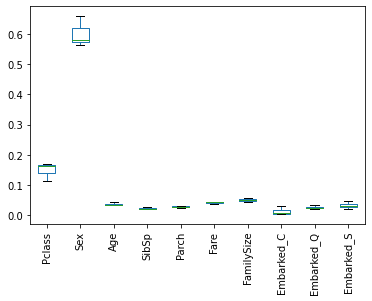

In [8]:
params = study.best_trial.params

def main():
    df_train = pd.read_csv("train.csv")

    train_y = df_train["Survived"]
    train_x = df_train.drop("Survived", axis=1)

    train_x = preprocess_df(train_x)
    accuracies, feature_importances = validate(train_x, train_y, params) # paramsに書き換えました。
    print(np.mean(accuracies))
    plot_feature_importances(feature_importances, train_x.columns)

    flag_product = True
    if flag_product:
        df_test = pd.read_csv("test.csv")
        df_test_raw = df_test.copy()
        test_x = preprocess_df(df_test)
        predict_df(train_x, train_y, test_x, df_test_raw, "result.csv")

if __name__ == "__main__":
    main()

In [9]:
import warnings
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

warnings.filterwarnings('ignore')

# main文
df_train = pd.read_csv("train.csv")
train_y = df_train["Survived"]
train_x = df_train.drop("Survived", axis=1)

train_x = preprocess_df(train_x)

accuracies = []

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
for train_idx, test_idx in cv.split(train_x, train_y):
    trn_x = train_x.iloc[train_idx, :]
    val_x = train_x.iloc[test_idx, :]

    trn_y = train_y.iloc[train_idx]
    val_y = train_y.iloc[test_idx]

    clf_xgb = xgb.XGBClassifier(**params)
    clf_lgb = lgb.LGBMClassifier(**params)

    clf_xgb.fit(trn_x, trn_y)
    clf_lgb.fit(trn_x, trn_y)
    
    # 平均値化するためにprobabilityを出した
    pred_proba_y_xgb = clf_xgb.predict_proba(val_x)[:, 1]
    pred_proba_y_lgb = clf_lgb.predict_proba(val_x)[:, 1]
    
    # probabilityの平均値が0.50を超えていれば1, そうでないなら0
    pred_proba_y = pd.DataFrame({"xgb": pred_proba_y_xgb, "lgb": pred_proba_y_lgb}).mean(axis=1)
    pred_y = [1 if proba > 0.50 else 0 for proba in pred_proba_y]
    accuracies.append(accuracy_score(val_y, pred_y))

print(np.mean(accuracies))

0.8136924803591471
